# Table of contents
1. [Purpose](#purpose)
2. [Inputs](#inputs)
    * [2.1 GAP Species Range Tables](#subinput1)
3. [Outputs](#outputs)
4. [Constraints](#constraints)
5. [Dependencies](#dependencies)
    * [5.1 Code Language](#codelanguage)
      * [5.1.1 package requirements](#packagerequirements)

6. [Code](#code)
    * [6.1 Python Package Import](#code61)
    * [6.2 Connection to ScienceBase Range Item](#code62)
    * [6.3 Looping Taxa Group Range Richness Summary and Dataframe Compilation](#code63)
    * [6.4 Correlation Calculations for Pairwise Comparisons](#code64)
    * [6.5 Calculation of the Overall Richness Index and Spearman's Correlation Coefficient](#code65)
    * [6.6 Pairwise Comparison Plots](#code66)
7. [Tests](#tests)
8. [Provenance](#provenance)
9. [Citations](#citations)
---

# Exploring species richness overlap for terrestrial vetebrates throughout the conterminous United States
<br/>

## Purpose <a name="purpose"></a>
Because biodiversity conservation requires a basic knowledge of where species occur and such knowledge for a complete set of species is often lacking, numerous authors have suggested taxa surrogacy as a potential solution. One type of surrogate are indicator taxa - those for which data on their spatial range (or other natural history attributes) is relatively abundant and can potentially represent other poorly understood (i.e. data deficient) species or groups. Therefore, indicator species' protection will infer protection of those other organisms (Landres et al. 1988, Prendergast et al. 1993, Beccaloni & Gaston 1995, Carroll & Pearson 1998, Margules & Pressey 2000, Lamoreux et al. 2006). 

The U.S. Geological Survey Gap Analysis Project (GAP) created range and habitat maps for 1590 terrestrial vertebrates that are known to occur within the conterminous United States (CONUS) including 219 sub-species (McKerrow et al. 2018, Gergely et al. 2019). GAP species range maps are created by attributing a vector file derived from the 12-digit Hydrologic Unit Dataset (USDA NRCS 2009). Attribution for each hydrologic unit (HUC) within the range included values for origin (native, introduced, reintroduced, vagrant), occurrence (extant, possibly present, potentially present, extirpated), reproductive use (breeding, non-breeding, both) and season (year-round, summer, winter, migratory, vagrant).

To test species concordance or overlap between the four taxa, pairwise comparisons of species richness were made using range-based richness for 12-digit HUCs within CONUS. While paired comparisons are interesting (e.g. how well does mammal richness represent bird richness on the landscape), a more pertinent comparison would be, how well does one taxon’s richness represent the richness of all other taxa? Such comparisons require the calculation of an additional measure of richness. Following methods used by Ricketts et al. (1999) and Hess et al. (2006), (also see Lamoreux et al. 2006) an overall species richness index was calculated for all combinations of taxa. In order to avoid biases in richness values for speciose taxa, the index is calculated for every 12-digit HUC by averaging the proportional richness for each taxon excluding the one being measured following the formula:

$$\displaystyle I_t = \frac{1}{n-1} \sum_{i\neq{t}} \frac{S_i}{D_i}$$

where $I_t$ is the overall richness index with taxon $t$ removed, $n$ is the number of compared groups (e.g. four taxa), $S_i$ is the species richness for taxon $i$ in a given 12-digit HUC, and $D_i$ is the total number of species for that group/taxon (in this case, the total number of species in the given taxon mapped by GAP in CONUS). Using this overall index, each taxon was compared to the remaining three. For all correlation analyses, nonparametric measures were used because data are not normally distributed.


## Inputs <a name="inputs"></a>
The code in this notebook compares species richness (i.e. the number of species) for each of four terrestrial vetebrate groups (amphibians, birds, mammals, reptiles) using correlation analysis. The unit of analysis is the 12-digit HUC ($n = $ 82717) - the basic unit of range maps. Only ranges for full species were included (i.e. sub-species excluded) to avoid multiple richness counts of sub-species in their range HUCs. The input processing species list could be altered to conduct a species subset analysis.
    
It utilizes species' range data available on the [USGS ScienceBase data catalog](https://www.sciencebase.gov/catalog/) as attached files in each species' child item. These files are available programmatically using the Python language with the USGS developed [sciencebasepy API package](https://github.com/usgs/sciencebasepy).


* **National GAP Range Tables for each taxon** <a name="subinput1"></a><br/>
Each of the four vertebrate taxa (amphibians, birds, mammals, reptiles) has a downloadable text file identifying origin, presence, reproductive use, and season within a range HUC for each species. Each file contains the following columns:

* **strUC** - a 6 letter species code
* **strHUC12RNG** - a 12 digit hydrologic unit code (HUC)
* **intGapOrigin** - a value representing the origin for that species in that HUC
    * 1 - native
    * 2 - introduced
    * 3 - either introduced or native
    * 4 - reintroduced
    * 5 - either reintroduced or native
    * 6 - vagrant
    * 7 - unknown
* **intGapPres** - a value representing the level of presence for that species in that HUC
    * 1 - known/extant
    * 2 - possibly present
    * 3 - potential for presence
    * 4 - extirpated/historical presence
    * 5 - extirpated purposely
    * 6 - occurs on indicated island chain
    * 7 - unknown
* **intGapRepro** - a value representing the reproductive use for that species in that HUC
    * 1 - breeding
    * 2 - nonbreeding
    * 3 - both breeding and nonbreeding
    * 7 - unknown
* **intGapSeas** - a value representing the seasonal use for that species in that HUC
    * 1 - year-round
    * 2 - migratory
    * 3 - winter only
    * 4 - summer only
    * 5 - passage migrant
    * 6 - seasonal permanence uncertain
    * 7 - unknown
    * 8 - vagrant


These files are available on ScienceBase here: https://www.sciencebase.gov/catalog/item/5951527de4b062508e3b1e79.

## Outputs <a name="outputs"></a>
Charts visualizing pairwise comparisons of species richness for each taxa group:
* [Range Richness Pairwise Comparisons using Scatterplots, Histograms, and Kernel Density Contours:](#scatterplot)
This gridded chart visualizes the comparisons of each taxa group richness with each other taxa group richness. Scatterplots only the lower portion of the grid include regression trendlines, the Pearson's correlation coefficient, and the non-parametric Kendall's tau coefficient to describe the strength of each comparison. Histograms show the richness count distributions (in 20 bins) for each taxa group. Kernel density contour plots visualize the number of HUCs that have the highest overlap in richness numbers across each taxa group comparison.


## Constraints <a name="constraints"></a>
Range and habitat mapping constraints. See user constraints section on the USGS ScienceBase [GAP Species Habitat Maps](https://www.sciencebase.gov/catalog/item/527d0a83e4b0850ea0518326) page

## Dependencies <a name="dependencies"></a>
Code execution and output visualization dependencies

* **Code Language** <a name="codelanguage"></a>  
This code is written in Python 3.x. Earlier versions may be compatible given slight alterations in syntax and package components.
  * **Python package requirements** <a name="packagerequirements"></a>  
  The required packages for proper code execution inlclude:
    - Pandas version 0.2x or above
    - numpy version 1.14.x or above
    - SciPy (scientific library) version 1.1.x or above
    - matplotlib (figures library) version 2.2.x or above
    - seaborn (statistical data visualization package) version 0.8 or above
    - sciencebasepy - USGS written Python package for interacting with the USGS ScienceBase API
    


## Tests <a name="tests"></a>


## Provenance <a name="provenance"></a>

## Code <a name="code"></a>

### Import required Python packages <a name="code61"></a>

In [1]:
import sys, sciencebasepy
import pandas as pd
import numpy as np
from datetime import datetime
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib
# Seaborn for pairplots
import seaborn as sns

starttime = datetime.now()
timestamp = starttime.strftime('%Y-%m-%d')

### Setup directory locations and taxa number variables 

In [2]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#            ++++ Directory Locations ++++
analysisDir = 'C:/Data/USGS Analyses/'
workDir = analysisDir + 'Taxa-Richness-Correlations/'

pd.set_option('display.max_columns', 10)

# Total numbers of species in taxa  # including subspecies
totAmph = 282 #284
totBird = 621 #649
totMamm = 365 #459
totRept = 322 #327


# Make an empty master dataframe
dfMaster = pd.DataFrame()

### Connect to ScienceBase and the GAP species ranges item <a name="code62"></a>

In [3]:
'''
    Connect to ScienceBase to pull down HUC-12 range tables.
    This uses the ScienceBase item for species habitat maps
    and searches for range table files with species range data in it.
    The range maps item has a unique id (5951527de4b062508e3b1e79).
    If this changes, the code will need to be re-written.

'''
sb = sciencebasepy.SbSession()
rangeItem = sb.get_item("5951527de4b062508e3b1e79")

# Set column types for the range table dataframe
coltypes = {'strUC':str,
            'strHUC12RNG':str,
            'intGapOrigin':int,
            'intGapPres':int,
            'intGapRepro':int,
            'intGapSeas':int}

### Loop over each taxa group and count the number of species in each range HUC <a name="code63"></a>
Species counts are limited to only full species (subspecies excluded) and range HUCs where species are known, possibly present, potentially present, and during year-round, winter, or summer seasons only. Portions of species' ranges that are vagrant, migratory, or historical are not included in the species counts.

In [4]:
taxa = ['Amphibians','Birds','Mammals','Reptiles']
for t in taxa:
    print("="*65)
    print("\nWorking on Range Table for " + t + " ....")
    for file in rangeItem["files"]:
        # Search for the file name pattern in the range item files dictionary
        if file['name'].startswith('National_GAP_{0}'.format(t)):
            try:
                
                dfRangeTable = pd.read_csv(StringIO(sb.get(file['url'])), dtype=coltypes)
                # Select only those records that are for full species
                dfRT2 = dfRangeTable[dfRangeTable['strUC'].str.endswith('x')]
                # Select only known, possibly, or potentially present;
                #             year-round, winter, or summer seasons
                select={'intGapPres':[1,2,3], 'intGapSeas':[1,3,4]}
                dfS1 = dfRT2[dfRT2[list(select)].isin(select).all(axis=1)]
                
                # Group by HUC12 and get the species count for each
                dfS2 = dfS1.groupby(['strHUC12RNG'])['strUC'].count()
                dfCount = pd.DataFrame(data=dfS2)
                dfCount = dfCount.rename(columns={'strUC':'n' + t})
                
                # Concatenate to the master dataframe
                print('   Concatenating with master dataframe ....')
                dfMaster = pd.concat([dfMaster,dfCount], axis=1, sort=False)
                # Make sure any missing values are 0 and the column type is integer
                dfMaster = dfMaster.replace(np.nan, 0, regex=True)
                dfMaster = dfMaster.astype(int)
                dfMaster.index.name = 'HUC12'
            
                print("="*65)
            except:
                print('!!! Could not Find Range Table Item File. Exiting !!!')
                sys.exit()




Working on Range Table for Amphibians ....
   Concatenating with master dataframe ....

Working on Range Table for Birds ....
   Concatenating with master dataframe ....

Working on Range Table for Mammals ....
   Concatenating with master dataframe ....

Working on Range Table for Reptiles ....
   Concatenating with master dataframe ....


In [5]:
dfMaster.head(10)

,nAmphibians,nBirds,nMammals,nReptiles
HUC12,,,,
010100010101,16,150,48,6
010100010102,16,150,48,6
010100010103,16,152,48,6
010100010104,17,152,48,6
010100010105,16,153,47,6
010100010106,17,150,48,6
010100010107,17,149,48,6
010100010108,17,152,48,6
010100010109,16,152,48,6


### Using the combined dataframe, start correlation calculations to compare richness across taxa groups <a name="code64"></a>

In [6]:
'''

    Start manipulating the master dataframe to conduct correlation analyses

'''
print('\n\n---Calculating Taxa Richness Correlations---\n')
# Run pairwise correlations using Kendall's tau
rcols = ['nAmphibians','nBirds','nMammals','nReptiles']
dfRichCorr = dfMaster[rcols]
# Raw pairwise correlations using Kendall's tau
print("  Calculating Kendalls's tau for pairwise taxa richness comparisons ....")
pw = dfRichCorr.corr(method='kendall')



---Calculating Taxa Richness Correlations---

  Calculating Kendalls's tau for pairwise taxa richness comparisons ....


### Calculate the overall richnes index ($I_t$) for each taxon and the Spearman's correlation coefficient <a name="code65"></a>

In [7]:
# Calculate proportional richness and overall richness index
dfMaster['ori-Amph'] = ((dfMaster['nBirds']/totBird)
                        +(dfMaster['nMammals']/totMamm)
                        +(dfMaster['nReptiles']/totRept))/3
dfMaster['ori-Bird'] = ((dfMaster['nAmphibians']/totAmph)
                        +(dfMaster['nMammals']/totMamm)
                        +(dfMaster['nReptiles']/totRept))/3
dfMaster['ori-Mamm'] = ((dfMaster['nAmphibians']/totAmph)
                        +(dfMaster['nBirds']/totBird)
                        +(dfMaster['nReptiles']/totRept))/3
dfMaster['ori-Rept'] = ((dfMaster['nAmphibians']/totAmph)
                        +(dfMaster['nBirds']/totBird)
                        +(dfMaster['nMammals']/totMamm))/3

# Spearman's rho correlations of raw richness v. overall richness index
print("  Calculating Spearman's rho with overall richness index ....\n")
spcorrAmph = dfMaster['nAmphibians'].corr(dfMaster['ori-Amph'], method='spearman')
spcorrBird = dfMaster['nBirds'].corr(dfMaster['ori-Bird'], method='spearman')
spcorrMamm = dfMaster['nMammals'].corr(dfMaster['ori-Mamm'], method='spearman')
spcorrRept = dfMaster['nReptiles'].corr(dfMaster['ori-Rept'], method='spearman')

# Pull Spearman's correlation data
spdata = [spcorrAmph, spcorrBird, spcorrMamm, spcorrRept]
# Make a static column of taxa and insert
# Spearman's correlation data and HUC number
spdict = {'Taxon':['Amphibians','Birds','Mammals','Reptiles'],
          'SpearmansRho':spdata}
# Make the dataframe
dfSR = pd.DataFrame(spdict)
# Reorder columns
dfSR = dfSR[['Taxon','SpearmansRho']]


  Calculating Spearman's rho with overall richness index ....



In [8]:
dfMaster.head(10)

,nAmphibians,nBirds,nMammals,nReptiles,ori-Amph,ori-Bird,ori-Mamm,ori-Rept
HUC12,,,,,,,,
010100010101,16,150,48,6,0.130562,0.068959,0.105639,0.143263
010100010102,16,150,48,6,0.130562,0.068959,0.105639,0.143263
010100010103,16,152,48,6,0.131636,0.068959,0.106713,0.144337
010100010104,17,152,48,6,0.131636,0.070141,0.107895,0.145519
010100010105,16,153,47,6,0.131259,0.068046,0.107249,0.143961
010100010106,17,150,48,6,0.130562,0.070141,0.106821,0.144445
010100010107,17,149,48,6,0.130025,0.070141,0.106284,0.143909
010100010108,17,152,48,6,0.131636,0.070141,0.107895,0.145519
010100010109,16,152,48,6,0.131636,0.068959,0.106713,0.144337


In [9]:
dfSR

,Taxon,SpearmansRho
0,Amphibians,0.324802
1,Birds,0.290298
2,Mammals,-0.132896
3,Reptiles,0.419168


In [10]:
pw

,nAmphibians,nBirds,nMammals,nReptiles
nAmphibians,1.000000,0.013879,-0.311357,0.458169
nBirds,0.013879,1.000000,0.285870,0.102238
nMammals,-0.311357,0.285870,1.000000,-0.131550
nReptiles,0.458169,0.102238,-0.131550,1.000000


### Plot pairwise comparisons on a gridded chart including scatterplots, histograms, and kernel density plots <a name="code66"></a>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


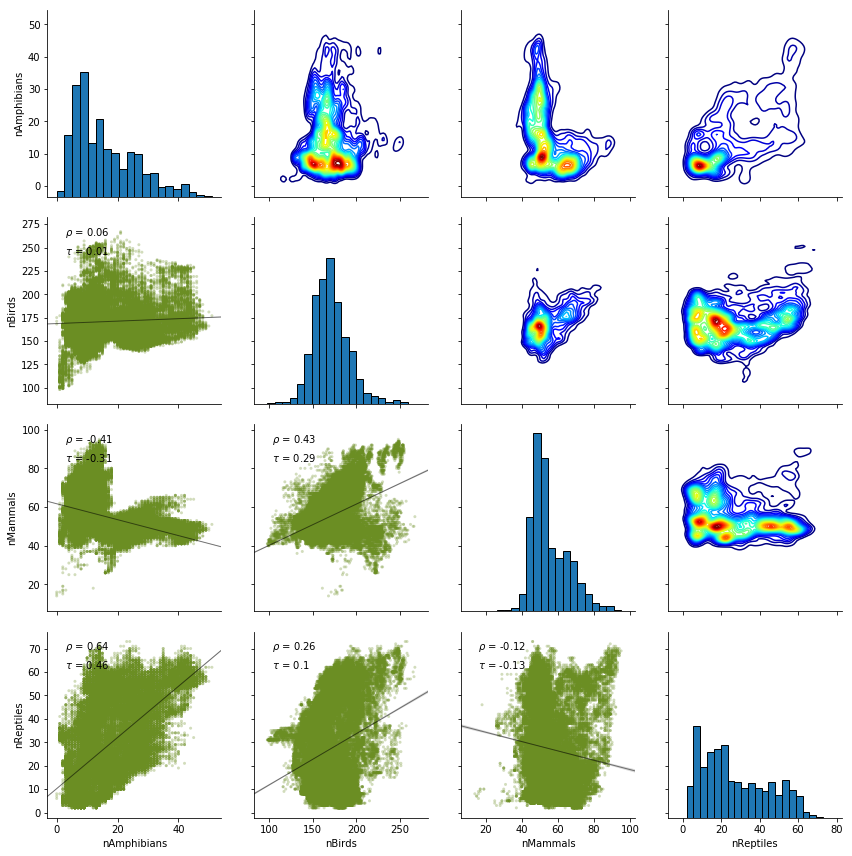

In [11]:
'''
    Plot pairwise data using the PairGrid class
    in the Seaborn visualization library 

'''

## First pull out only the pairwise columns from the master dataframe
dfPW = dfMaster[['nAmphibians','nBirds','nMammals','nReptiles']]


# Make a function to calculate Pearson's and Kendall's correlation coefficients
# for pairwise comparisons and make them labels for scatter plots
def corrs(x, y, **kwargs):
    from scipy.stats import kendalltau
    # Calculate Pearson coefficient value
    p = np.corrcoef(x, y)[0][1]
    # Calculate Kendall coefficient values
    t = kendalltau(x, y)[0]
    
    # Make the rho label
    label1 = r'$\rho$ = ' + str(round(p, 2))
    # Make the tau label
    label2 = r'$\tau$ = ' + str(round(t, 2))
    
    # Add each label to the plot
    ax = plt.gca()
    ax.annotate(label1, xy = (0.1, 0.9), xycoords = ax.transAxes)
    ax.annotate(label2, xy = (0.1, 0.8), xycoords = ax.transAxes)

# Plot the pairwise comparisons with PairGrid where:
#  the diagonal of the grid plot are histograms for that taxa's richness within range HUCs
#  the upper portion of the grid plot are kernel density contour plots
#  the lower of the grid plot are scatter plots with a trend line 
#  and Pearson and Kendall correlation coefficents for each comparison

grid = sns.PairGrid(data= dfPW, size = 3)
grid = grid.map_upper(sns.kdeplot,n_levels=30, cmap='jet')
grid = grid.map_diag(plt.hist, bins = 20, edgecolor='k')
grid = grid.map_lower(sns.regplot, marker='.', scatter_kws={"alpha":0.3, "edgecolor":'none', "color":'olivedrab'}, line_kws={"color":'black',"alpha":0.5,"lw":1})
grid = grid.map_lower(corrs)

### Plot each taxa group with the Overall Richness Index ($I_t$) and calculate the Spearman's rho rank correlation coefficient as a measure of that taxa's strength as an indicator of richness for all other taxa groups

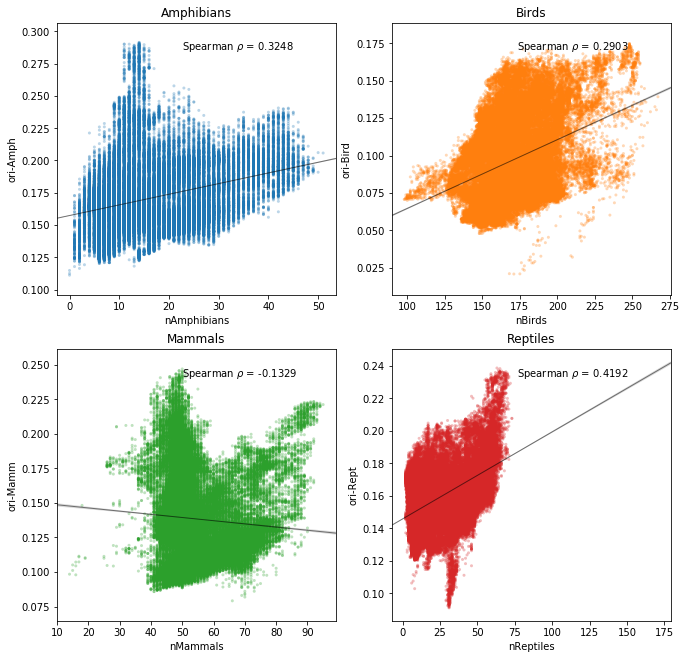

In [18]:
'''
    Now make scatterplots for each taxa group comparison with the
    Overall Richness Index with that group removed (I).
    The non-parametric Spearman's correlation coefficient (rho) is
    calculated for each taxa comparison because the data are not
    normally distributed.

'''
### Make individual taxa subplots on a 2x2 figure ###

fig, axs = plt.subplots(2, 2, figsize=(11, 11))
axs = axs.flatten()


# Add an iterator variable
i=0
for ax, t in zip(axs, taxa):

    # Pull out the taxa specific data from dfMaster
    ncol = 'n{0}'.format(t)
    icol = 'ori-{0}'.format(t[:4])
    dfT = dfMaster[[ncol, icol]]
    
    # Set an axes title
    ax.set_title(t)
    
    # Use the default color palette from Seaborn as variables
    c = sns.color_palette()[i]
    
    # Plot a scatter plot and add a trend line
    # Use the Seaborn colors in the plot with all taxa for individual taxa
    sns.regplot(x=dfT[ncol],y=dfT[icol],marker='.', ax=ax,
               scatter_kws={"alpha":0.3, "edgecolor":'none', "color":c},
               line_kws={"color":'black',"alpha":0.5,"lw":1})

    sr = dfSR.iloc[i,1]
    # Make the label
    label = r'Spearman $\rho$ = ' + str(round(sr, 4))
    ax.annotate(label, xy = (0.45, 0.9), xycoords = ax.transAxes)
    
    i+=1


## Citations <a name="citations"></a>

Beccaloni GW, Gaston KJ. (1995). Predicting the species richness of neotropical forest but terf lies: Ithomiinae (Lepidoptera: Nymphalidae) as indicators. Biological Conservation 71: 77-86. https://doi.org/10.1016/0006-3207(94)00023-J

Carroll SS, Pearson DL. (1998). Spatial modelling of butterfly species richness using tiger beetles (Cicindelidae) as a bioindicator taxon. Ecological Applications 8: 531-543. https://doi.org/10.1890/1051-0761(1998)008[0531:SMOBSR]2.0.CO;2

Gergely KJ, Boykin KG, McKerrow AJ, Rubino MJ, Tarr NM, and Williams SG, (2019), Gap Analysis Project (GAP) terrestrial vertebrate species richness maps for the conterminous U.S.: U.S. Geological Survey Scientific Investigations Report 2019-5034, 99 p., https://doi.org/10.3133/sir20195034.

Hess GR, RA Bartel, AK Leidner, KM Rosenfeld, MJ Rubino, SA Snider, TR Ricketts. (2006). Effectiveness of biodiversity indicators varies with extent, grain, and region. Biological Conservation 132(4) 448-457. https://doi.org/10.1016/j.biocon.2006.04.037

Lamoreux JF, Morrison JC, Rickett, TH, Olson DM, Dinerstein, McKnight MW & Shugart HH. (2006). Global test of biodiversity concordance and the importance of endemism. Nature, 440, 212-214. https://doi.org/10.1038/nature04291

Landres P, Verner J, Thomas J. (1988). Ecological uses of vertebrate indicator species - a critique. Conservation Biology 2, 316-328. https://doi.org/10.1111/j.1523-1739.1988.tb00195.x

Margules CR, Pressey RL.  (2000). Systematic conservation planning. Nature 405, 243-253. https://doi.org/10.1038/35012251

McKerrow AJ, NM Tarr MJ Rubino and SG Williams. (2018). Patterns of species richness hotspots and estimates of their protection are sensitive to spatial resolution. Diversity and Distributions 24:1461-1477, https://doi.org/10.1111/ddi.12779

Prendergast JR, Quinn RM, Lawton JH, Eversham BC, Gibbons DW. (1993). Rare species, the coincidence of diversity hotspots and conservation strategies. Nature 365: 335-337. https://doi.org/10.1038/365335a0

Ricketts T, Dinerstein E, Olson DM, Louck, C. (1999). Who’s where in North America?: Patterns of species richness and the utility of indicator taxa for conservation. BioScience 49, 369-381. https://doi.org/10.2307/1313630